<a href="https://colab.research.google.com/github/fionong/ADALL_github/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Core libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI

# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("devansodariya/student-performance-data")
print("Downloaded to:", path)
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "student_data.csv"))

from io import StringIO
from google.colab import userdata

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    # This is the default and can be omitted
    api_key=api_key,
)

Using Colab cache for faster access to the 'student-performance-data' dataset.
Downloaded to: /kaggle/input/student-performance-data
['student_data.csv']


In [1]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions=(
        "You are a senior Python data scientist. "
        "Respond ONLY with executable Python code. "
        "Do not include explanations or markdown."
    ),
    input=(
        "Write Python code using pandas to:\n"
        "1. Display the shape of a DataFrame\n"
        "2. Show column dtypes\n"
        "3. Generate summary statistics\n"
        "4. Check for missing values\n\n"
        "Assume the DataFrame is named df."
    ),
)

print(response.output_text)

Using Colab cache for faster access to the 'student-performance-data' dataset.
Downloaded to: /kaggle/input/student-performance-data
['student_data.csv']
print("Shape:", df.shape)

print("\nColumn dtypes:")
print(df.dtypes)

print("\nDataFrame info:")
df.info()

print("\nSummary statistics (all columns):")
print(df.describe(include='all').transpose())

print("\nMissing values (count):")
print(df.isnull().sum())

print("\nMissing values (%):")
print((df.isnull().mean() * 100).round(2))


In [6]:
print("Shape:", df.shape)

print("\nColumn dtypes:")
print(df.dtypes)

print("\nDataFrame info:")
df.info()

print("\nSummary statistics (all columns):")
print(df.describe(include='all').transpose())

print("\nMissing values (count):")
print(df.isnull().sum())

print("\nMissing values (%):")
print((df.isnull().mean() * 100).round(2))

Shape: (395, 33)

Column dtypes:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         3

In [5]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions=(
        "You are a senior Python data scientist. "
        "Respond ONLY with executable Python code. "
        "Do not include explanations or markdown."
    ),
    input=(
        "Write Python code using buffer create a text-based payload that LLM can use for deeper analysis and clearer recommendations.. The description should summarise the dataset structure, key columns, size, and any notable data issues."
    ),
)

print(response.output_text)

import pandas as pd
import numpy as np
import io
from typing import Optional

def create_llm_payload(df: Optional[pd.DataFrame] = None,
                       csv_path: Optional[str] = None,
                       sample_rows: int = 5,
                       top_n_key_columns: int = 5) -> str:
    """
    Inspects a DataFrame (or CSV file) and builds a textual payload in a buffer
    summarizing the dataset structure, key columns, size, and notable data issues,
    along with pragmatic recommendations for an LLM to provide deeper analysis.
    Returns the payload string.
    """
    # Load data if needed
    if df is None:
        if csv_path is not None:
            df = pd.read_csv(csv_path)
        else:
            # fallback: create a small example DataFrame
            df = pd.DataFrame({
                "id": range(1, 11),
                "date": pd.date_range("2021-01-01", periods=10),
                "feature_num": [1, 2, 2, 3, 1000, 5, np.nan, 7, 8, 9],
                "featu

In [7]:
import pandas as pd
import numpy as np
import io
from typing import Optional

def create_llm_payload(df: Optional[pd.DataFrame] = None,
                       csv_path: Optional[str] = None,
                       sample_rows: int = 5,
                       top_n_key_columns: int = 5) -> str:
    """
    Inspects a DataFrame (or CSV file) and builds a textual payload in a buffer
    summarizing the dataset structure, key columns, size, and notable data issues,
    along with pragmatic recommendations for an LLM to provide deeper analysis.
    Returns the payload string.
    """
    # Load data if needed
    if df is None:
        if csv_path is not None:
            df = pd.read_csv(csv_path)
        else:
            # fallback: create a small example DataFrame
            df = pd.DataFrame({
                "id": range(1, 11),
                "date": pd.date_range("2021-01-01", periods=10),
                "feature_num": [1, 2, 2, 3, 1000, 5, np.nan, 7, 8, 9],
                "feature_cat": ["a", "b", "a", "b", "c", "a", None, "c", "b", "a"],
                "target": [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
            })

    buf = io.StringIO()

    # Basic info
    n_rows, n_cols = df.shape
    buf.write(f"Dataset overview:\n")
    buf.write(f"- Rows: {n_rows}\n")
    buf.write(f"- Columns: {n_cols}\n\n")

    # Memory usage
    try:
        mem = df.memory_usage(deep=True).sum()
        buf.write(f"- Memory usage (approx): {mem} bytes\n\n")
    except Exception:
        pass

    # Column dtypes
    buf.write("Columns and dtypes:\n")
    for col, dt in df.dtypes.items():
        buf.write(f"- {col}: {dt}\n")
    buf.write("\n")

    # Missing values and uniqueness
    missing = df.isnull().sum()
    missing_pct = (missing / max(1, n_rows)).sort_values(ascending=False)
    buf.write("Missing values (count and percent) [sorted]:\n")
    for col in missing_pct.index:
        cnt = missing[col]
        pct = missing_pct[col] * 100
        buf.write(f"- {col}: {cnt} missing ({pct:.2f}%)\n")
    buf.write("\n")

    nunique = df.nunique(dropna=False).sort_values()
    buf.write("Unique values per column (including NaN if present) [sorted ascending]:\n")
    for col, uniq in nunique.items():
        buf.write(f"- {col}: {uniq}\n")
    buf.write("\n")

    # Basic samples
    buf.write(f"Sample rows (up to {sample_rows} rows):\n")
    sample = df.head(sample_rows)
    buf.write(sample.to_csv(index=False))
    buf.write("\n")

    # Numeric summary
    num_df = df.select_dtypes(include=[np.number])
    if not num_df.empty:
        buf.write("Numeric columns summary (describe):\n")
        descr = num_df.describe().T
        for col, row in descr.iterrows():
            buf.write(f"- {col}: count={int(row['count'])}, mean={row['mean']:.4g}, std={row['std']:.4g}, min={row['min']:.4g}, 25%={row['25%']:.4g}, 50%={row['50%']:.4g}, 75%={row['75%']:.4g}, max={row['max']:.4g}\n")
        buf.write("\n")

        # Variance and skewness
        var = num_df.var().sort_values(ascending=False)
        skew = num_df.skew().sort_values(key=lambda s: s.abs(), ascending=False)
        buf.write("Numeric columns by variance (top):\n")
        for col, v in var.head(top_n_key_columns).items():
            buf.write(f"- {col}: variance={v:.4g}\n")
        buf.write("\n")
        buf.write("Numeric columns by absolute skewness (top):\n")
        for col, s in skew.head(top_n_key_columns).items():
            buf.write(f"- {col}: skewness={s:.4g}\n")
        buf.write("\n")

        # Correlations
        corr = num_df.corr().abs()
        high_corr_pairs = []
        cols = corr.columns.tolist()
        for i in range(len(cols)):
            for j in range(i+1, len(cols)):
                val = corr.iloc[i, j]
                if pd.notna(val) and val >= 0.8:
                    high_corr_pairs.append((cols[i], cols[j], val))
        if high_corr_pairs:
            buf.write("High numeric correlations (abs(corr) >= 0.8):\n")
            for a, b, v in sorted(high_corr_pairs, key=lambda x: -x[2]):
                buf.write(f"- {a} <-> {b}: {v:.3f}\n")
            buf.write("\n")

        # Outlier detection by IQR
        buf.write("Outlier counts (IQR method) for numeric columns:\n")
        for col in num_df.columns:
            col_series = num_df[col].dropna()
            if col_series.empty:
                continue
            q1 = col_series.quantile(0.25)
            q3 = col_series.quantile(0.75)
            iqr = q3 - q1
            if iqr == 0:
                out_15 = 0
                out_3 = 0
            else:
                lower_15 = q1 - 1.5 * iqr
                upper_15 = q3 + 1.5 * iqr
                lower_3 = q1 - 3.0 * iqr
                upper_3 = q3 + 3.0 * iqr
                out_15 = col_series[(col_series < lower_15) | (col_series > upper_15)].shape[0]
                out_3 = col_series[(col_series < lower_3) | (col_series > upper_3)].shape[0]
            buf.write(f"- {col}: >1.5*IQR outliers={out_15}, >3*IQR outliers={out_3}\n")
        buf.write("\n")

    # Categorical summary
    cat_df = df.select_dtypes(include=['object', 'category', 'bool'])
    if not cat_df.empty:
        buf.write("Categorical / object columns summary (top values):\n")
        for col in cat_df.columns:
            top_vals = df[col].value_counts(dropna=False).head(5)
            buf.write(f"- {col}: {len(top_vals)} top values listed below (value: count, percent):\n")
            for val, cnt in top_vals.items():
                pct = cnt / max(1, n_rows) * 100
                buf.write(f"    * {repr(val)}: {cnt} ({pct:.2f}%)\n")
        buf.write("\n")

    # Duplicates and constant columns
    dup_count = df.duplicated().sum()
    buf.write(f"Duplicates and constants:\n- Duplicate rows: {dup_count}\n")
    const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
    buf.write(f"- Constant columns (1 or 0 unique values): {const_cols if const_cols else 'None'}\n\n")

    # Date columns detection
    date_cols = []
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.datetime64):
            date_cols.append(col)
        elif df[col].dtype == object:
            # try parse a small sample to see if it's date-like
            sample = df[col].dropna().astype(str).head(100)
            if not sample.empty:
                parsed = pd.to_datetime(sample, errors='coerce')
                parsed_rate = parsed.notna().sum() / len(sample)
                if parsed_rate > 0.8:
                    date_cols.append(col)
    if date_cols:
        buf.write("Detected date-like columns and their ranges:\n")
        for col in date_cols:
            try:
                col_parsed = pd.to_datetime(df[col], errors='coerce')
                buf.write(f"- {col}: min={col_parsed.min()}, max={col_parsed.max()}, nulls={col_parsed.isna().sum()}\n")
            except Exception:
                buf.write(f"- {col}: could not parse full range\n")
        buf.write("\n")

    # Key columns heuristics
    # Identify potential key columns: low missing, high uniqueness, no duplicates
    potential_keys = []
    for col in df.columns:
        if df[col].isnull().sum() == 0 and df[col].nunique(dropna=False) == n_rows:
            potential_keys.append(col)
    if potential_keys:
        buf.write(f"Potential primary key columns (unique, no nulls): {potential_keys}\n\n")

    # Identify candidate target columns
    target_candidates = []
    for col in df.columns:
        if col.lower() in ["target", "label", "y"]:
            target_candidates.append(col)
    # Also search for binary numeric columns
    for col in num_df.columns if not num_df.empty else []:
        vals = df[col].dropna().unique()
        if set(np.unique(vals)).issubset({0,1}):
            target_candidates.append(col)
    if target_candidates:
        buf.write(f"Candidate target/label columns: {sorted(set(target_candidates))}\n\n")

    # Notable data issues (heuristics)
    buf.write("Notable data issues (heuristic):\n")
    issues = []
    # missingness
    high_missing = missing_pct[missing_pct > 0.3]
    if not high_missing.empty:
        issues.append(f"Columns with >30% missing: {list(high_missing.index)}")
    moderate_missing = missing_pct[(missing_pct > 0) & (missing_pct <= 0.3)]
    if not moderate_missing.empty:
        issues.append(f"Columns with missing values (<=30%): {list(moderate_missing.index)}")
    # high cardinality
    high_card = []
    for col in df.columns:
        uniq = df[col].nunique(dropna=False)
        if uniq / max(1, n_rows) > 0.95 and uniq > 20:
            high_card.append(col)
    if high_card:
        issues.append(f"High cardinality columns (>95% unique): {high_card}")
    # duplicates
    if dup_count > 0:
        dup_rate = dup_count / max(1, n_rows)
        issues.append(f"Duplicate rows present: {dup_count} ({dup_rate:.2%})")
    # constant columns
    if const_cols:
        issues.append(f"Constant columns (no variance): {const_cols}")
    # mixed types for numeric-ish columns
    mixed_type_cols = []
    for col in df.columns:
        if df[col].dtype == object:
            # if majority of non-null values are numeric strings
            nonnull = df[col].dropna().astype(str)
            if len(nonnull) > 0:
                coerced = pd.to_numeric(nonnull, errors='coerce')
                if coerced.notna().sum() / len(nonnull) >= 0.8:
                    mixed_type_cols.append(col)
    if mixed_type_cols:
        issues.append(f"Object columns that appear numeric (mixed types): {mixed_type_cols} - consider converting to numeric")
    # highly skewed numeric
    skewed = []
    if not num_df.empty:
        for col in num_df.columns:
            s = num_df[col].skew()
            if pd.notna(s) and abs(s) > 2:
                skewed.append(col)
    if skewed:
        issues.append(f"Highly skewed numeric columns (|skew|>2): {skewed}")
    if not issues:
        buf.write("- No major issues detected by simple heuristics.\n\n")
    else:
        for it in issues:
            buf.write(f"- {it}\n")
        buf.write("\n")

    # Clear recommendations
    buf.write("Initial recommendations for deeper analysis and preprocessing:\n")
    recs = [
        "1) Assess and decide imputation per column (simple mean/median for numeric; mode or 'missing' token for categorical; consider predictive imputation for important features).",
        "2) Remove or consolidate constant columns and columns with near-100% missingness unless they have special meaning.",
        "3) For high-cardinality categorical features, consider hashing, target encoding, or frequency encoding instead of one-hot.",
        "4) Convert date-like columns to datetime and extract features (year, month, day, weekday, elapsed time) where relevant.",
        "5) Address duplicates: inspect and drop if they are exact duplicates and not meaningful.",
        "6) Treat outliers depending on domain: transform (log), cap/floor, or model-robust methods; document choices.",
        "7) If high correlation exists between numeric features, consider dimensionality reduction (PCA) or dropping redundant features to avoid multicollinearity.",
        "8) For skewed numeric features, consider transforms (log, Box-Cox, Yeo-Johnson) before modeling.",
        "9) If target class imbalance is present, consider stratified sampling, resampling methods (SMOTE, ADASYN), or class-weighted models.",
        "10) Validate data types: convert mixed-type object columns to appropriate numeric or datetime types and verify parsing quality."
    ]
    for r in recs:
        buf.write(f"- {r}\n")
    buf.write("\n")

    # Suggested questions for the LLM analyst
    buf.write("Suggested follow-up analysis/questions for the LLM to perform or ask:\n")
    suggestions = [
        "A) Which features are most predictive of the target? Provide feature importance or SHAP analysis recommendations.",
        "B) Propose domain-agnostic feature engineering steps based on column semantics (dates, ids, categories, numerics).",
        "C) Suggest a sensible modeling pipeline (preprocessing + candidate models) and hyperparameter tuning ranges.",
        "D) Identify potential data leakage sources and how to test for them.",
        "E) Recommend evaluation metrics appropriate to the target and class balance."
    ]
    for s in suggestions:
        buf.write(f"- {s}\n")

    payload = buf.getvalue()
    buf.close()
    return payload

if __name__ == "__main__":
    # Example usage: load a CSV by path or let the function create a sample dataset
    # Replace csv_path with a real file path to inspect your dataset
    csv_path = None  # e.g., "data/my_dataset.csv"
    payload = create_llm_payload(csv_path=csv_path, sample_rows=5)
    print(payload)

Dataset overview:
- Rows: 10
- Columns: 5

- Memory usage (approx): 926 bytes

Columns and dtypes:
- id: int64
- date: datetime64[ns]
- feature_num: float64
- feature_cat: object
- target: int64

Missing values (count and percent) [sorted]:
- feature_num: 1 missing (10.00%)
- feature_cat: 1 missing (10.00%)
- id: 0 missing (0.00%)
- date: 0 missing (0.00%)
- target: 0 missing (0.00%)

Unique values per column (including NaN if present) [sorted ascending]:
- target: 2
- feature_cat: 4
- feature_num: 9
- date: 10
- id: 10

Sample rows (up to 5 rows):
id,date,feature_num,feature_cat,target
1,2021-01-01,1.0,a,0
2,2021-01-02,2.0,b,1
3,2021-01-03,2.0,a,0
4,2021-01-04,3.0,b,1
5,2021-01-05,1000.0,c,1

Numeric columns summary (describe):
- id: count=10, mean=5.5, std=3.028, min=1, 25%=3.25, 50%=5.5, 75%=7.75, max=10
- feature_num: count=9, mean=115.2, std=331.8, min=1, 25%=2, 50%=5, 75%=8, max=1000
- target: count=10, mean=0.5, std=0.527, min=0, 25%=0, 50%=0.5, 75%=1, max=1

Numeric columns by 

/tmp/ipython-input-3890386396.py:158: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample, errors='coerce')


In [11]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions=(
        "You are a senior Python data scientist. "
    ),
    input=(
        "Create a histogram to review the grade distribution (0–20) for each subject grades (G1, G2, G3). A subject is considered failed when grade is below 10."
    ),
)

print(response.output_text)

Below is a compact, ready-to-run Python example that draws side-by-side histograms of G1, G2 and G3 with integer bins 0–20, marks the pass/fail threshold (<10) and prints the failed percentage on each plot. It assumes you have a pandas DataFrame called df with columns 'G1','G2','G3'. If you don’t, I include a tiny fake-data example so you can run it end-to-end.

Code:

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Example data (remove if you already have df) ---
# np.random.seed(0)
# df = pd.DataFrame({
#     'G1': np.clip((np.random.normal(11, 4, 200)).round(), 0, 20),
#     'G2': np.clip((np.random.normal(10, 5, 200)).round(), 0, 20),
#     'G3': np.clip((np.random.normal(12, 3.5, 200)).round(), 0, 20),
# })

# If you already have a DataFrame, ensure it contains G1, G2, G3
# columns and they are numeric (0-20).

subjects = ['G1', 'G2', 'G3']
bins = np.arange(0, 22) - 0.5   # integer bins centered on 0..20

fig, axes = plt.subplots(1, 3, figsize=(15

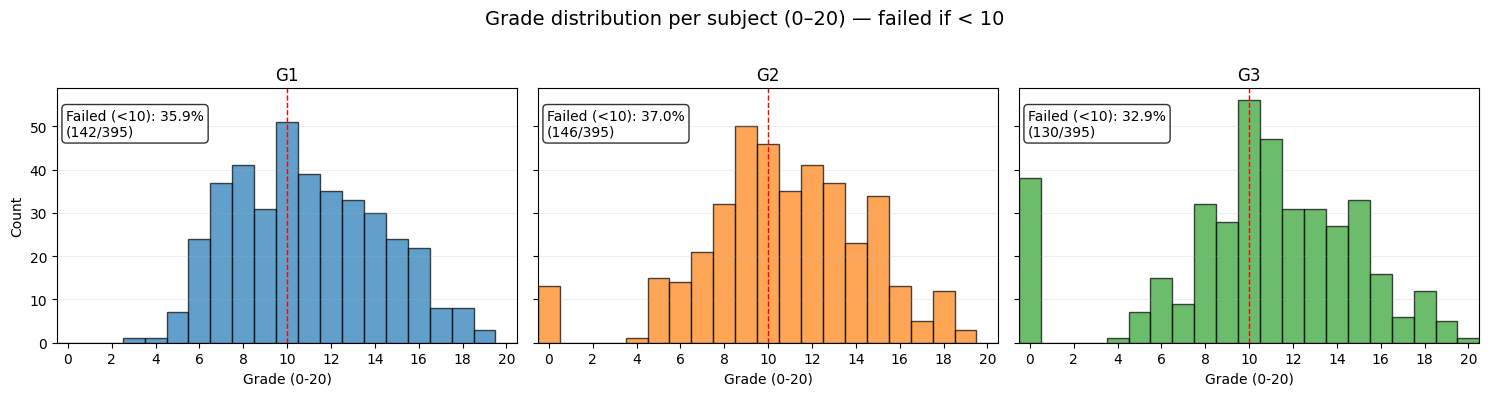

In [12]:
subjects = ['G1', 'G2', 'G3']
bins = np.arange(0, 22) - 0.5   # integer bins centered on 0..20

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
colors = ['C0', 'C1', 'C2']

for ax, subj, c in zip(axes, subjects, colors):
    data = df[subj].dropna().astype(int)  # ensure integer bins
    ax.hist(data, bins=bins, color=c, edgecolor='black', alpha=0.7)
    ax.set_title(subj)
    ax.set_xlim(-0.5, 20.5)
    ax.set_xticks(range(0, 21, 2))    # show every 2 ticks for readability
    ax.set_xlabel('Grade (0-20)')
    ax.grid(axis='y', alpha=0.2)

    # mark fail threshold and annotate percent failed
    fail_mask = data < 10
    failed_count = fail_mask.sum()
    total = data.size
    failed_pct = 100 * failed_count / total if total > 0 else 0
    ax.axvline(10, color='red', linestyle='--', linewidth=1)
    ax.text(0.02, 0.92, f'Failed (<10): {failed_pct:.1f}%\n({failed_count}/{total})',
            transform=ax.transAxes, va='top', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

axes[0].set_ylabel('Count')
fig.suptitle('Grade distribution per subject (0–20) — failed if < 10', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions=(
        "You are a senior Python data scientist. "
    ),
    input=(
        "Create a histogram to count of failed subjects based on G1/G2/G3 < 10"
    ),
)

print(response.output_text)

I don't have your data here, so below are two short, ready-to-run examples you can adapt. Both assume you have a pandas DataFrame df with columns "G1", "G2", "G3" (student grades) and that "failed" is defined as grade < 10.

Option A — histogram of how many failed grades each student has (0, 1, 2, or 3):
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('student-mat.csv')  # load your data
fail_cols = ['G1', 'G2', 'G3']
threshold = 10

# If there can be NaNs and you want to treat them as non-failures:
# df = df.dropna(subset=fail_cols)

# count per student how many of G1,G2,G3 are < threshold
df['fail_count'] = (df[fail_cols] < threshold).sum(axis=1)

plt.figure(figsize=(6,4))
sns.countplot(x='fail_count', data=df, palette='Set2')
plt.title(f'Number of failed grades per student (grade < {threshold})')
plt.xlabel('Number of failed grades (0 to 3)')
plt.ylabel('Number of students')
plt.xticks([0,1,2,3])
plt.tight_layout()
plt.show()
`

/tmp/ipython-input-4192778057.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fail_count', data=df, palette='Set2')


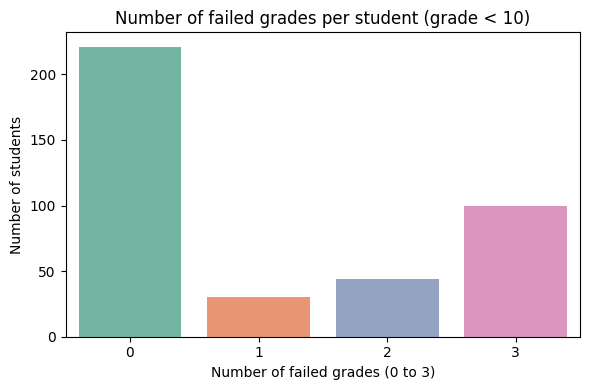

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('student-mat.csv')  # load your data
fail_cols = ['G1', 'G2', 'G3']
threshold = 10

# If there can be NaNs and you want to treat them as non-failures:
# df = df.dropna(subset=fail_cols)

# count per student how many of G1,G2,G3 are < threshold
df['fail_count'] = (df[fail_cols] < threshold).sum(axis=1)

plt.figure(figsize=(6,4))
sns.countplot(x='fail_count', data=df, palette='Set2')
plt.title(f'Number of failed grades per student (grade < {threshold})')
plt.xlabel('Number of failed grades (0 to 3)')
plt.ylabel('Number of students')
plt.xticks([0,1,2,3])
plt.tight_layout()
plt.show()